In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('./diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


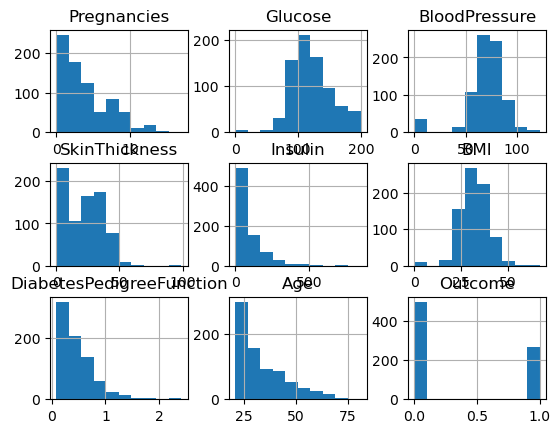

In [13]:
df.hist()
plt.show()

Iteration 1/1000 -> Accuracy: 0.6771, Misclassifications: 248
Iteration 101/1000 -> Accuracy: 0.7018, Misclassifications: 229
Iteration 201/1000 -> Accuracy: 0.6979, Misclassifications: 232
Iteration 301/1000 -> Accuracy: 0.6810, Misclassifications: 245
Iteration 401/1000 -> Accuracy: 0.7070, Misclassifications: 225
Iteration 501/1000 -> Accuracy: 0.6914, Misclassifications: 237
Iteration 601/1000 -> Accuracy: 0.6940, Misclassifications: 235
Iteration 701/1000 -> Accuracy: 0.7031, Misclassifications: 228
Iteration 801/1000 -> Accuracy: 0.6849, Misclassifications: 242
Iteration 901/1000 -> Accuracy: 0.7044, Misclassifications: 227
Iteration 1000/1000 -> Accuracy: 0.6953, Misclassifications: 234
Final Model Accuracy: 69.66%


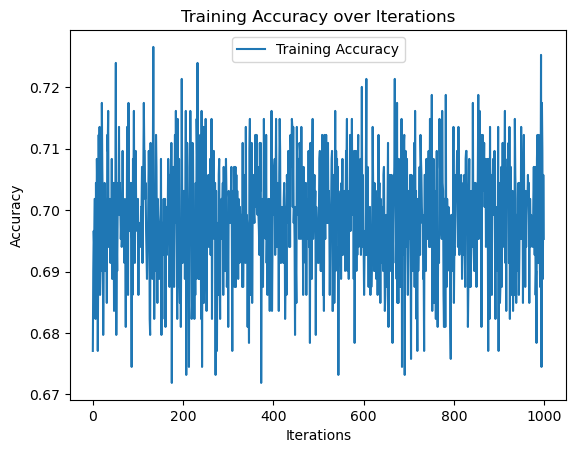

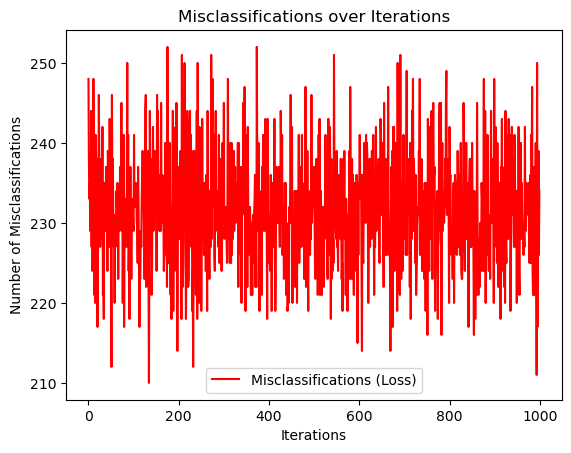

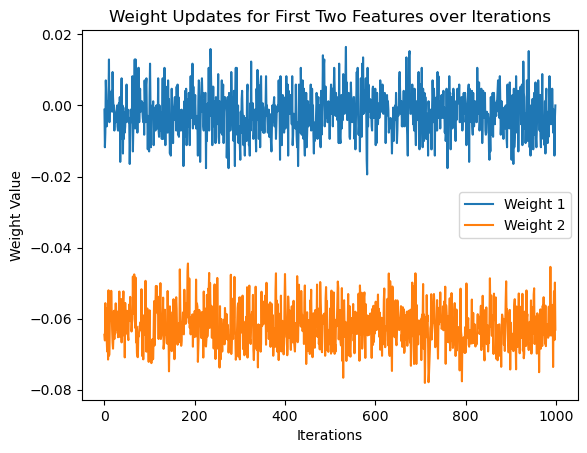

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# clean and load the file 
def load_and_clean_libsvm_data(filename):
    data = []
    labels = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 0:  
                continue
            try:
                labels.append(int(parts[0]))  # First element is the class label (+1 or -1)
                features = np.zeros(8)  # assuming that there are 8 features 
                for item in parts[1:]:
                    index, value = item.split(":")
                    features[int(index) - 1] = float(value) 
                data.append(features)
            except Exception as e:
                print(f"Skipping line due to formatting issue: {line.strip()} -> {e}")
                continue
    return np.array(data), np.array(labels)

# load and clean the dataset 
X, y = load_and_clean_libsvm_data('Diabetes.txt')

# codes for perceptron training 
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.training_accuracy = []  # tracking the accuracy
        self.loss_history = []  # tracking the missclaffications 
        self.weight_history = []  # tracking how weights evolve

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for iteration in range(self.n_iterations):
            correct_classifications = 0
            misclassifications = 0

            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                if y[idx] * y_predicted > 0:
                    correct_classifications += 1
                else:
                    misclassifications += 1

                # following the rules for perception, the weights and bias should change if misclassified 
                if y[idx] * y_predicted <= 0:
                    self.weights += self.learning_rate * y[idx] * x_i
                    self.bias += self.learning_rate * y[idx]

            # accuracy calculation
            accuracy = correct_classifications / n_samples
            self.training_accuracy.append(accuracy)
            self.loss_history.append(misclassifications)
            self.weight_history.append(self.weights.copy())  

            # for every 100 iterations, record the data
            if iteration % 100 == 0 or iteration == self.n_iterations - 1:
                print(f"Iteration {iteration + 1}/{self.n_iterations} -> Accuracy: {accuracy:.4f}, Misclassifications: {misclassifications}")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

    # Plot training accuracy over iterations
    def plot_training_accuracy(self):
        plt.figure()
        plt.plot(range(self.n_iterations), self.training_accuracy, label="Training Accuracy")
        plt.title("Training Accuracy over Iterations")
        plt.xlabel("Iterations")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

    #  number of misclassifications (loss) over iterations
    def plot_loss(self):
        plt.figure()
        plt.plot(range(self.n_iterations), self.loss_history, label="Misclassifications (Loss)", color="red")
        plt.title("Misclassifications over Iterations")
        plt.xlabel("Iterations")
        plt.ylabel("Number of Misclassifications")
        plt.legend()
        plt.show()

    # visualize how the weights change over iterations 
    def plot_weight_updates(self):
        weight_history = np.array(self.weight_history)
        plt.figure()
        plt.plot(range(self.n_iterations), weight_history[:, 0], label="Weight 1")
        plt.plot(range(self.n_iterations), weight_history[:, 1], label="Weight 2")
        plt.title("Weight Updates for First Two Features over Iterations")
        plt.xlabel("Iterations")
        plt.ylabel("Weight Value")
        plt.legend()
        plt.show()

# training the model
perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron.fit(X, y)

# making predictions 
predictions = perceptron.predict(X)

# calculating accuracy
accuracy = np.mean(predictions == y) * 100
print(f"Final Model Accuracy: {accuracy:.2f}%")

# visualizing accuracy 
perceptron.plot_training_accuracy()

# visualizing loss over accuracy 
perceptron.plot_loss()

# visualizing weight updates 
perceptron.plot_weight_updates()
